# MoMA Artworks: Exploratory Data Analysis & Visualization

This notebook details the steps taken to conduct an exploratory analysis on the artworks dataset provided by the 
Museum of Modern Art (MoMA). This dataset includes artworks that have been accessioned into MoMA's collection and cataloged in its database. This exploratory analysis attempts to uncover what kinds of artworks are represented at MoMA.

In [23]:
#First begin by importing the following libraries to conduct the analysis and create visualizations:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Then read the CSV file to get a better picture of the data:

artworks = pd.read_csv("https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv")
artworks

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138213,Plate from Chad gadya (The Tale of a Goat),El Lissitzky,3569,"(Russian, 1890–1941)",(Russian),(1890),(1941),(Male),1919,One from an illustrated book with thirteen lit...,...,NaN,NaN,NaN,NaN,24.3000,NaN,NaN,20.3000,NaN,NaN
138214,Plate from Chad gadya (The Tale of a Goat),El Lissitzky,3569,"(Russian, 1890–1941)",(Russian),(1890),(1941),(Male),1919,One from an illustrated book with thirteen lit...,...,NaN,NaN,NaN,NaN,23.4000,NaN,NaN,19.8000,NaN,NaN
138215,Plate from Chad gadya (The Tale of a Goat),El Lissitzky,3569,"(Russian, 1890–1941)",(Russian),(1890),(1941),(Male),1919,One from an illustrated book with thirteen lit...,...,NaN,NaN,NaN,NaN,24.4000,NaN,NaN,20.8000,NaN,NaN
138216,Cover from Chad gadya (The Tale of a Goat),El Lissitzky,3569,"(Russian, 1890–1941)",(Russian),(1890),(1941),(Male),1919,One from an illustrated book with thirteen lit...,...,NaN,NaN,NaN,NaN,8.4000,NaN,NaN,7.8000,NaN,NaN


In [25]:
#Print out column names to get it as a list:

print('artworks column names=', artworks.columns)

artworks column names= Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')


In [26]:
#Drop the following columns that are not necessary for my current analysis:

artworks.drop(columns = ['URL', 'ThumbnailURL', 'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)','Duration (sec.)', 'AccessionNumber', 
        'Medium', 'Dimensions', 'BeginDate', 'EndDate','ArtistBio', 'Cataloged', 'ObjectID', 'ConstituentID',
        'Nationality', 'Gender'], inplace = True)
print('artworks column names', artworks.columns)

artworks column names Index(['Title', 'Artist', 'Date', 'CreditLine', 'Classification', 'Department',
       'DateAcquired'],
      dtype='object')


In [27]:
#Determine if there are any missing data:

print('artworks missing data:')
print(artworks.isnull().sum())

artworks missing data:
Title               39
Artist            1310
Date              2222
CreditLine        2471
Classification       0
Department           0
DateAcquired      7132
dtype: int64


In [28]:
#Check data types:

df = artworks
df.dtypes

Title             object
Artist            object
Date              object
CreditLine        object
Classification    object
Department        object
DateAcquired      object
dtype: object

In [29]:
#Change all columns from object to string:

df['Title'] = df['Title'].astype(str)
df['Artist'] = df['Artist'].astype(str)
df['CreditLine'] = df['CreditLine'].astype(str)
df['Classification'] = df['Classification'].astype(str)
df['Department'] = df['Department'].astype(str)
df['Date'] = df['Date'].astype(str)

In [30]:
df['DateAcquired'] = pd.to_datetime(df['DateAcquired']).dt.strftime("%Y%m%d")

In [31]:
#Ensure that the nan values are also getting read:

df = pd.read_csv('https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv', na_values=['nan'])

In [32]:
#Fill in missing data:

df['Title'].fillna('N/A', inplace = True) 
df['Artist'].fillna('N/A', inplace = True) 
df['CreditLine'].fillna('N/A', inplace = True) 
df['Classification'].fillna('N/A', inplace = True) 
df['Department'].fillna('N/A', inplace = True) 
df['Date'].fillna('N/A', inplace = True)
df['DateAcquired'].fillna('N/A', inplace = True)

In [33]:
#Confirm that the number of entries is consistent with what MoMA's Github states. We both have 138,218 records.

len(df)

138218

# Analysis & Visualizations

In [34]:
df['Department'].unique()

array(['Architecture & Design', 'Drawings & Prints',
       'Painting & Sculpture', 'Photography', 'Media and Performance',
       'Film', 'Architecture & Design - Image Archive',
       'Fluxus Collection'], dtype=object)

Listing each department name.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

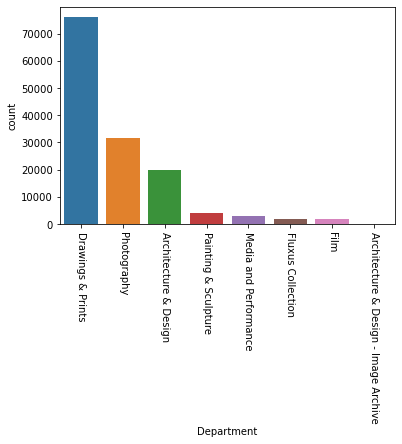

In [35]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Department', data=df, order = df['Department'].value_counts().index)
 
# Rotate x-labels
plt.xticks(rotation=-90)

Then create a chart that shows the distribution of artworks between each departments. From the chart, we can see that the Drawings & Prints department contains the most artworks.

In [36]:
df['Classification'].unique()

array(['Architecture', 'Mies van der Rohe Archive', 'Design',
       'Illustrated Book', 'Print', 'Drawing', 'Periodical', 'Film',
       'Multiple', 'Installation', 'Film (object)', 'Photograph',
       'Painting', 'Ephemera', 'Photography Research/Reference', 'Video',
       'Media', 'Performance', 'Sculpture', 'Work on Paper', 'Poster',
       'Audio', '(not assigned)', 'Textile', 'Digital', 'Collage',
       'Graphic Design', 'Frank Lloyd Wright Archive',
       'Furniture and Interiors', 'Software', 'Architectural Model',
       'Publication'], dtype=object)

Listing every classification used to label artworks.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

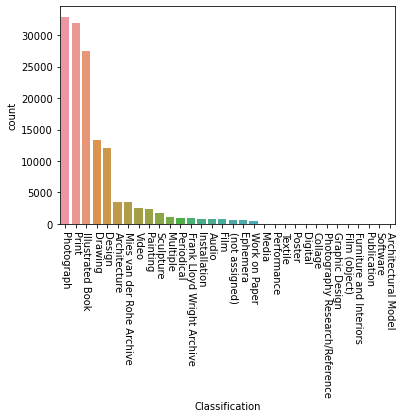

In [37]:
sns.countplot(x='Classification', data=df, order = df['Classification'].value_counts().index)
 
plt.xticks(rotation=-90)

In [38]:
df['Classification'].value_counts()[:10]

Photograph                   32915
Print                        31875
Illustrated Book             27450
Drawing                      13372
Design                       12011
Architecture                  3462
Mies van der Rohe Archive     3418
Video                         2521
Painting                      2362
Sculpture                     1725
Name: Classification, dtype: int64

Plotting the classifications helps to confirm that the Drawings & Prints department holds the most artworks. However, the graph and the actual counts for each classification shows that the photograph classification actually contains more artworks, with print coming in close.

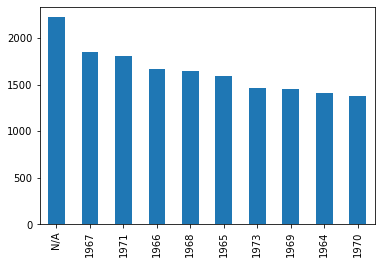

In [39]:
df['Date'].value_counts()[:10].plot(kind='bar')

We can see that a leading number of artworks do not have a creation date, as it may be missing or uknown. However, it is interesting to see the 1960's-1970's heavily represented when plotting the top ten dates, suggesting that many of the museum's artworks were created during this period.

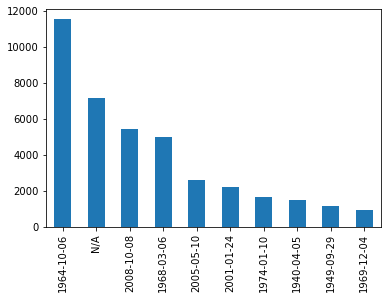

In [40]:
df['DateAcquired'].value_counts()[:10].plot(kind='bar')

The museum acquired a good number of its artworks from the year 1964. This decade aligns with the creation dates of most of the artworks in the musuem, which may suggest that the museum was actively acquiring during this period when many artworks were being created.

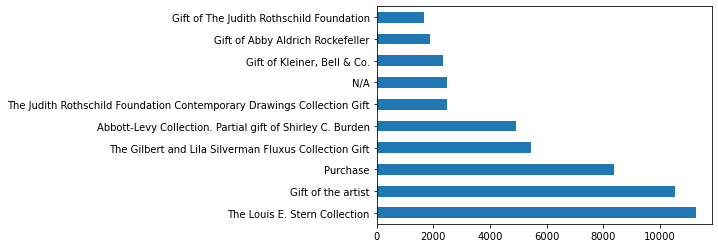

In [41]:
df['CreditLine'].value_counts()[:10].plot(kind='barh')

When plotting the CreditLine data, we see that the Louis E. Stern Collection contributed the most artworks to the museum. By looking at the top ten CreditLines by count, it illustrates that most of the museum's artworks were gifts/donations from organizations and collectors.

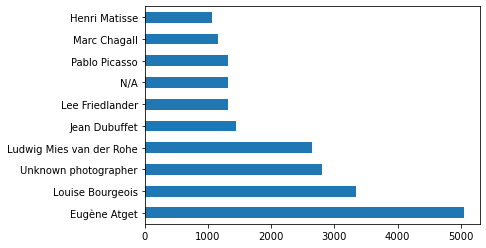

In [42]:
df['Artist'].value_counts()[:10].plot(kind='barh')

Eugene Atget is the artist who has the most artworks in MoMA's collection. Other familiar names have also made their way into the top ten list of artists by count of artworks.

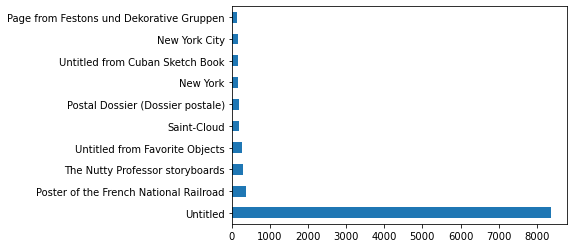

In [43]:
df['Title'].value_counts()[:10].plot(kind='barh')

Finally, I wanted to see if there were any extensive works of art in MoMA's collection. The chart lists 'Untitled' as the most extensive work of art. However, many artworks do not have titles and are not necessarily from the same set of work. As such, 'Untitled' may just be all of the museum's works that have unknown or missing titles grouped together as one. 

# Findings

From this exploratory analysis of the MoMA artworks dataset, it appears that the most represented type of art is either a print/drawing or photograph that came from a collector or organization. Although the years of creation are unknown for many works, the 1960's-1970's seem to have produced the most artworks, with MoMA also acquiring and adding to its collection during this time.